In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline 

In [5]:
df = pd.
_csv("../Dataset/new_data.csv", encoding="ISO-8859-1")

In [6]:
df

,sentiment,news
0,neutral,According to Gran the company have no plan to ...
1,neutral,Technopolis plan to develop in stage an area o...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the companyupdated strategy for t...
...,...,...
4835,negative,LONDON MarketWatch Share price end lower in Lo...
4836,neutral,Rinkuskiaibeer sale fell by 6 per cent to 4 m ...
4837,negative,Operating profit fell to EUR 35 m from EUR 68 ...
4838,negative,Net sale of the Paper segment decrease to EUR ...


# Pre processing & Choice of K

In [7]:
vectorizer = CountVectorizer(max_features=5000, min_df=10, stop_words="english", lowercase=True)
df_news = vectorizer.fit_transform(df["news"])

In [8]:
sse_list = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=42)
    kmeans.fit(df_news)
    sse_list.append( kmeans.inertia_ )

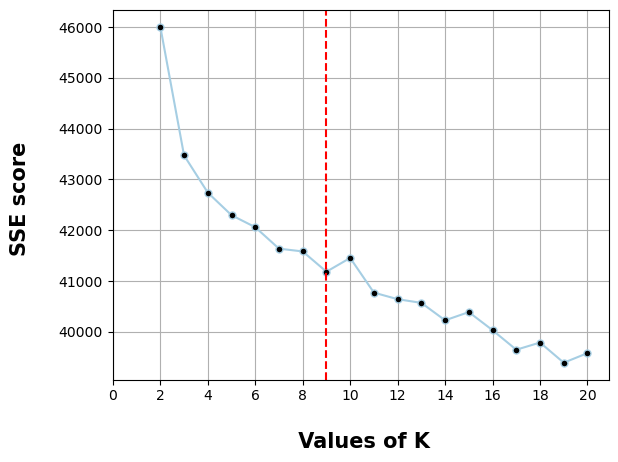

In [41]:
# Display results    
values = np.arange(0, 22, 2)
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(2, len(sse_list)+2), sse_list, marker='.', markersize=10, markerfacecolor='black')
plt.ylabel('SSE score \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.axvline(9, color = "r", linestyle='--') #, linestyle='--')  
plt.xticks(values)
plt.grid(True)
plt.show()

In [73]:
from sklearn import metrics

k_test = range(2,21,1) # [2,...., 36]
silhouette_scores_stand = {}

for k in k_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(df_news)
    labels_k = model_kmeans_k.labels_
    k_score_stand = metrics.silhouette_score(df_news, labels_k)
    silhouette_scores_stand[k] = k_score_stand
    print("With k = ", k ,"   ", "S.Score:","  " , k_score_stand)
    
print("Done!")

With k =  2     S.Score:    0.13232764458591134
With k =  3     S.Score:    0.06400068907704017
With k =  4     S.Score:    0.04284735938511935
With k =  5     S.Score:    0.060832907952590984
With k =  6     S.Score:    0.04122497600584778
With k =  7     S.Score:    0.043651606277795595
With k =  8     S.Score:    0.03152464937640211
With k =  9     S.Score:    0.032376891014650605
With k =  10     S.Score:    0.032622281368964924
With k =  11     S.Score:    0.019814534511093274
With k =  12     S.Score:    0.0354381062991794
With k =  13     S.Score:    0.02261750627891492
With k =  14     S.Score:    0.028218678871868894
With k =  15     S.Score:    0.026913924520476307
With k =  16     S.Score:    0.019475096515626823
With k =  17     S.Score:    0.031079314353549558
With k =  18     S.Score:    0.012108880749208602
With k =  19     S.Score:    0.03188055888196715
With k =  20     S.Score:    0.02137954219124735
Done!


In [65]:
silhouette_list = list(silhouette_scores_stand.values())

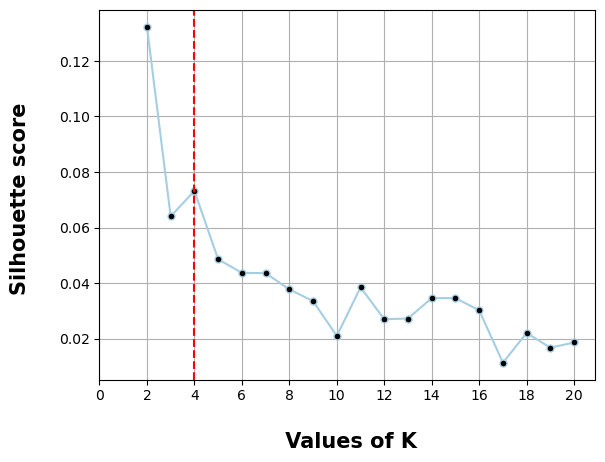

In [67]:
# Display results    
values = np.arange(0, 22, 2)
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(2, len(silhouette_list)+2), silhouette_list, marker='.', markersize=10, markerfacecolor='black')
plt.ylabel('Silhouette score \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.axvline(4, color = "r", linestyle='--') #, linestyle='--')  
plt.xticks(values)
plt.grid(True)
plt.show()

# Results inspection

### Case 1: K = 4

In [81]:
k_clusters = 4

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(df_news)
clusters = model.predict(df_news)

In [82]:
unique, counts = np.unique(model.labels_, return_counts=True)
counts

array([ 423,  540,  681, 3196], dtype=int64)

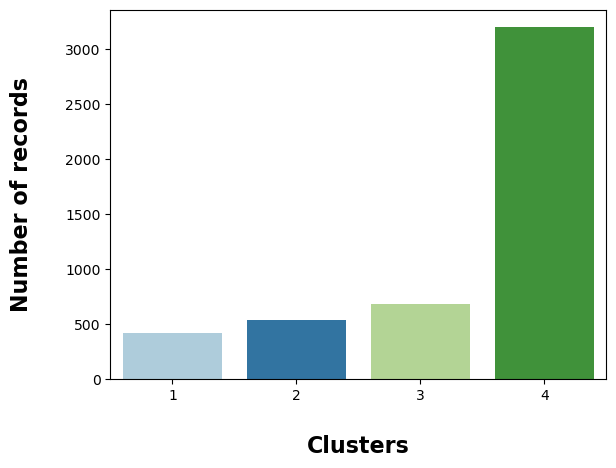

In [83]:
sns.set_palette("Paired")
sns.barplot(np.arange(1,5), counts)
plt.xlabel("\nClusters", fontsize=16, fontweight='bold')
plt.ylabel("Number of records\n",fontsize=16, fontweight='bold')
plt.show()

In [85]:
print('SSE', model.inertia_)
print('Silhouette', silhouette_score(df_news, model.labels_))

SSE 42302.77526022188
Silhouette 0.042599896578635055


### Case 1: K = 9

In [86]:
k_clusters = 9

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(df_news)
clusters = model.predict(df_news)

In [88]:
unique, counts = np.unique(model.labels_, return_counts=True)
counts

array([2466,  332,  469,   68,  555,  208,  256,  243,  243], dtype=int64)

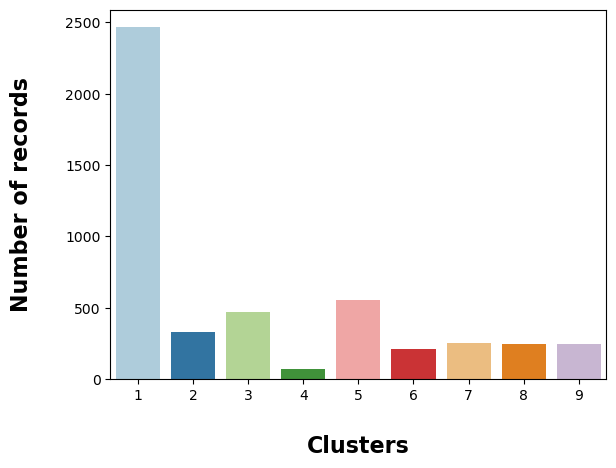

In [89]:
sns.set_palette("Paired")
sns.barplot(np.arange(1,10), counts)
plt.xlabel("\nClusters", fontsize=16, fontweight='bold')
plt.ylabel("Number of records\n",fontsize=16, fontweight='bold')
plt.show()


In [90]:
print('SSE', model.inertia_)
print('Silhouette', silhouette_score(df_news, model.labels_))

SSE 41066.91758851777
Silhouette 0.027250204132683097


# Most common word in each cluster

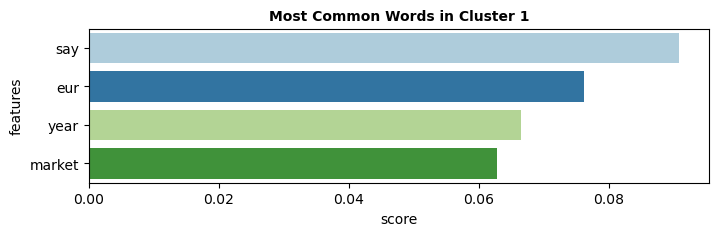

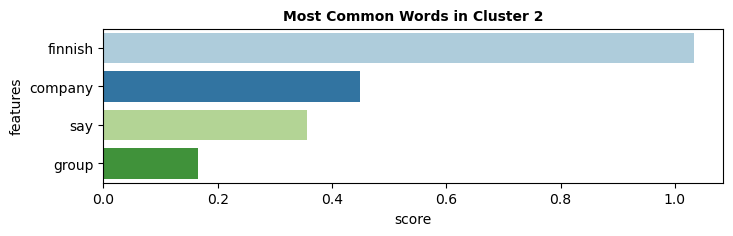

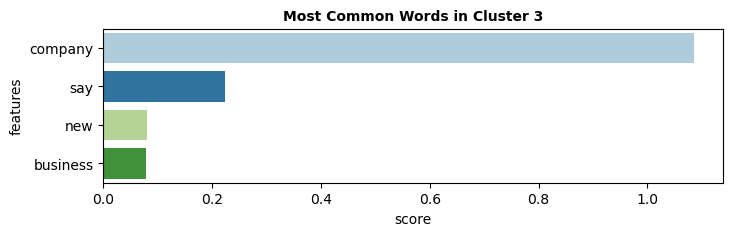

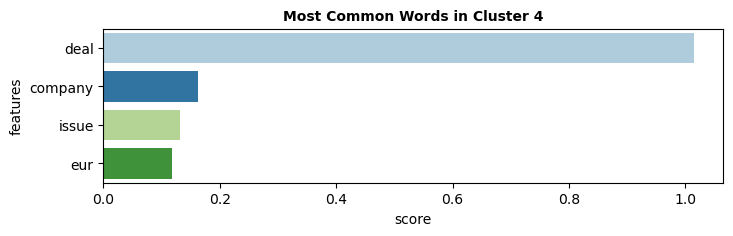

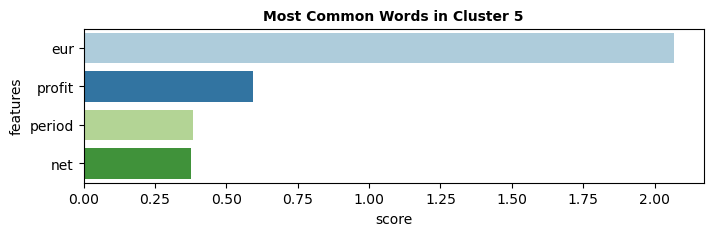

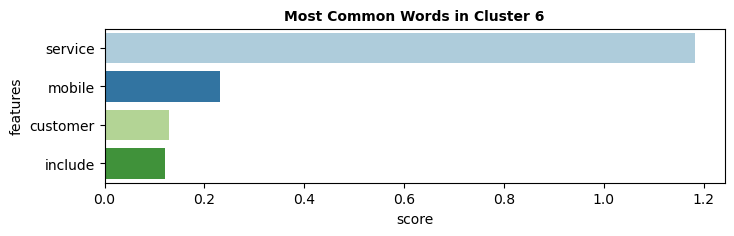

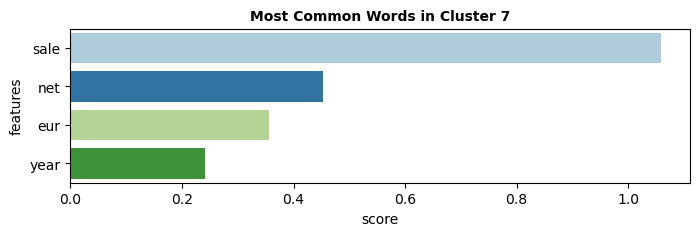

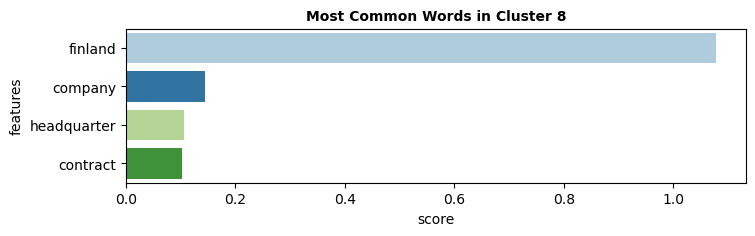

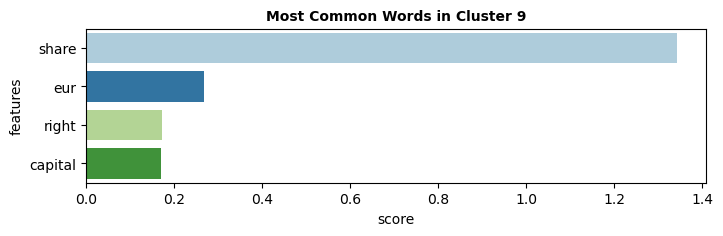

In [36]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df1 = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df1)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i+1)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(df_news.toarray(), clusters, 4)
plotWords(dfs, 4)

## Sentiment Count

In [37]:
def distr_sent_cluster(prediction):
    labels = np.unique(prediction)
    list_indx = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        list_indx.append(id_temp)
    return(list_indx)
lista_indx = distr_sent_cluster(clusters)

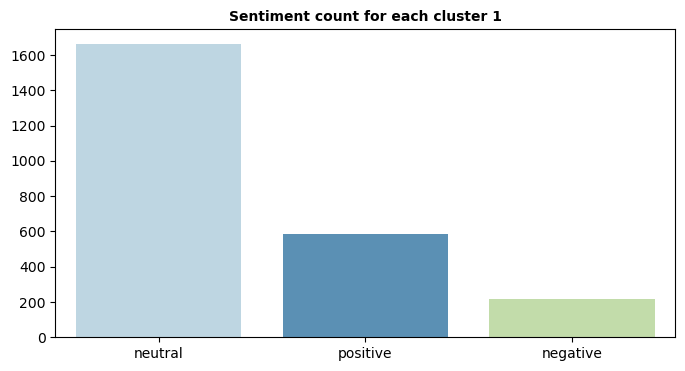

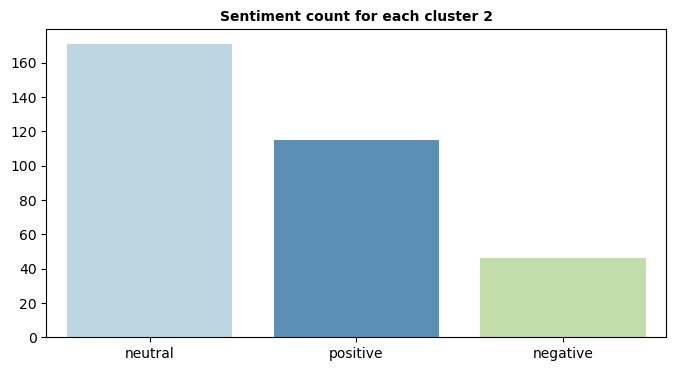

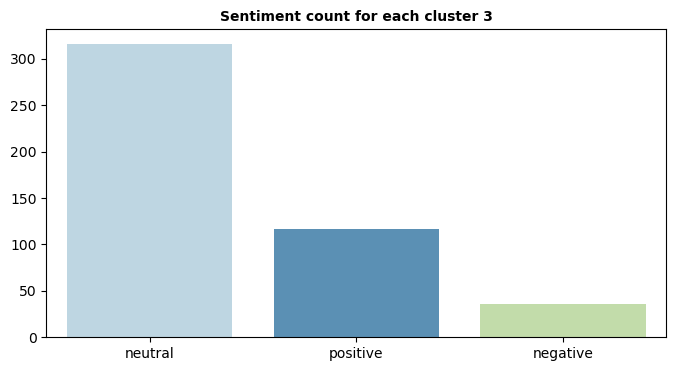

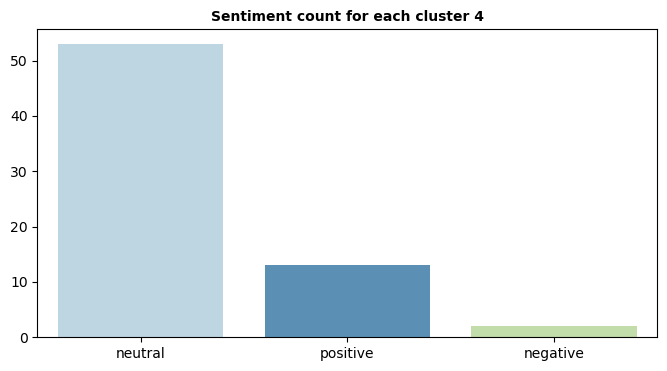

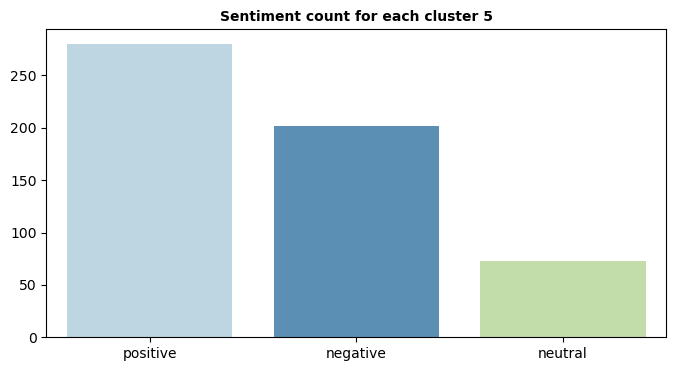

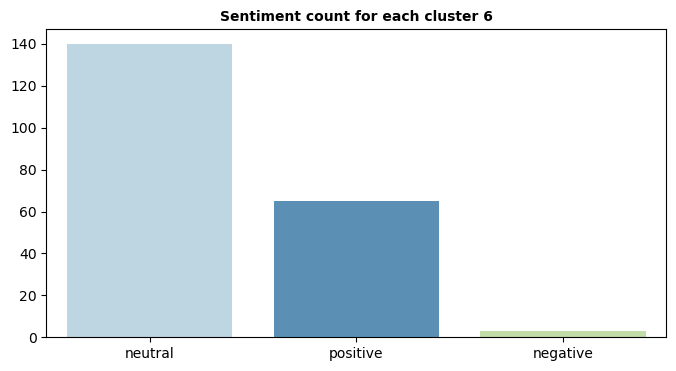

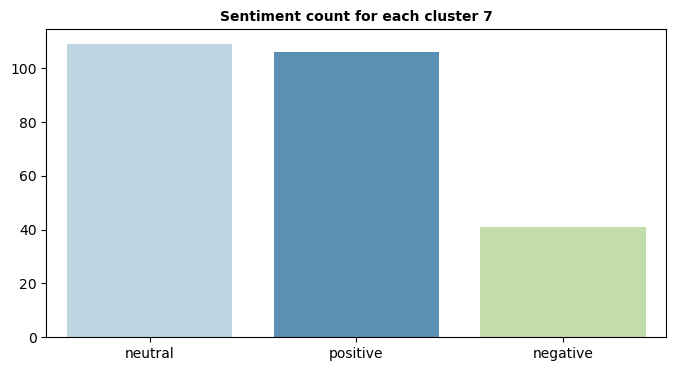

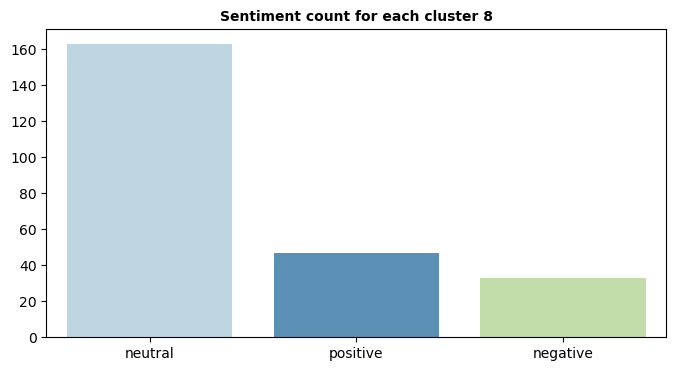

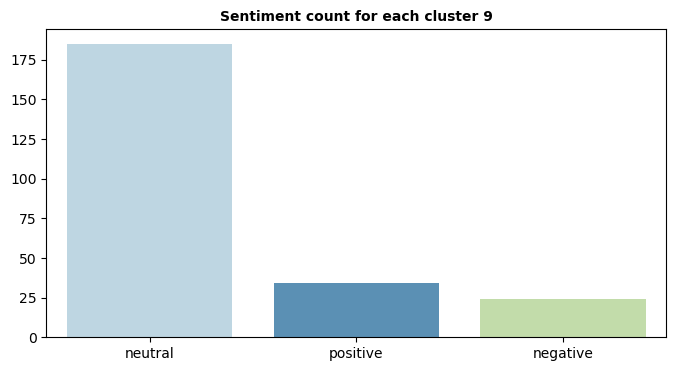

In [38]:
def plot_distr_clust(lista_indici):
    for i in range(0, len(lista_indici)):
        cnt_pro = df.loc[lista_indici[i][0]].sentiment.value_counts()
        plt.figure(figsize=(8, 4))
        plt.title(("Sentiment count for each cluster {}".format(i+1)), fontsize=10, fontweight='bold')
        sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
        
plot_distr_clust(lista_indx)

# Word Cloud for each cluster

In [39]:
def wordcount_gen(df, num_cluster):
    combined_tweets = " ".join(df.loc[lista_indx[num_cluster][0]]["news"])                     
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title(("Word Cloud for cluster n.{}\n".format(i+1)), fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()

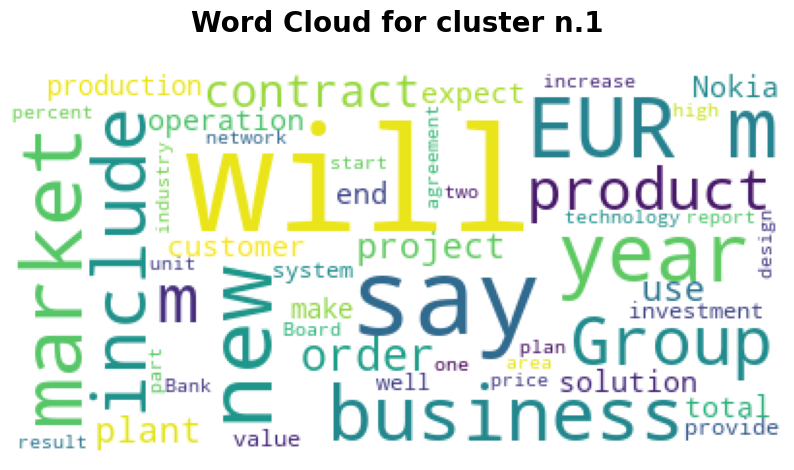

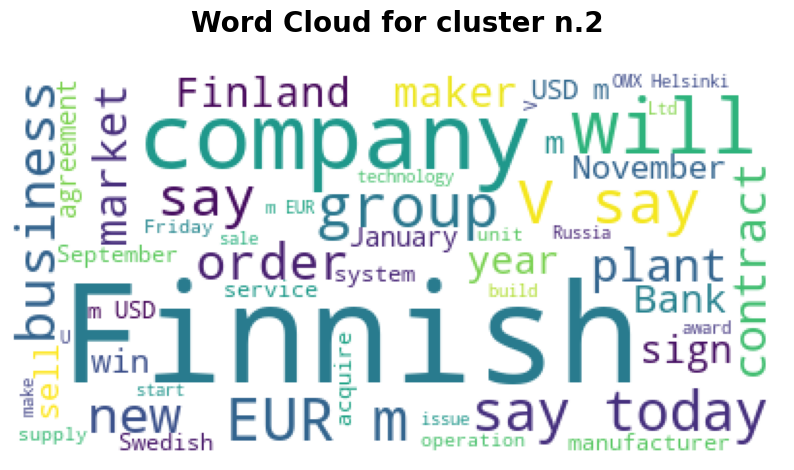

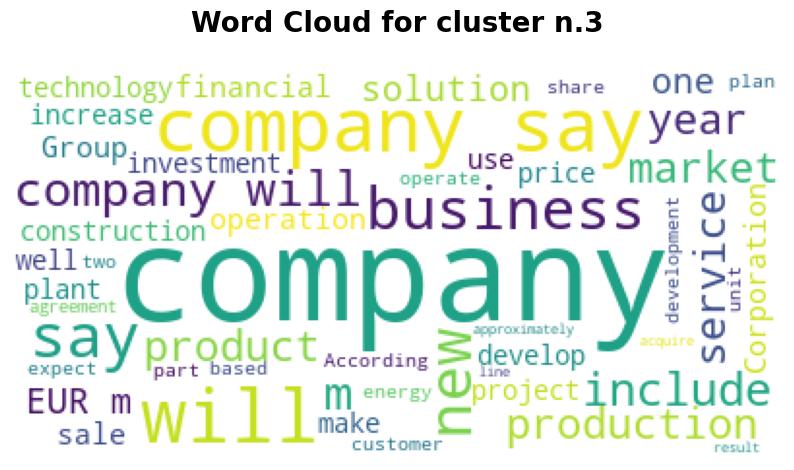

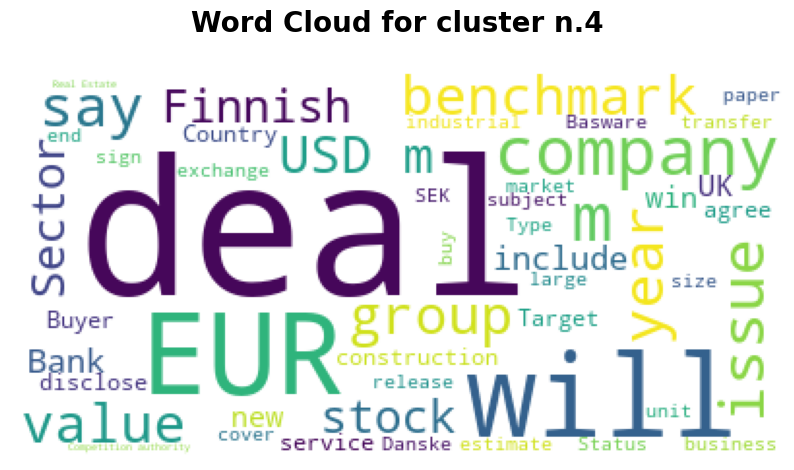

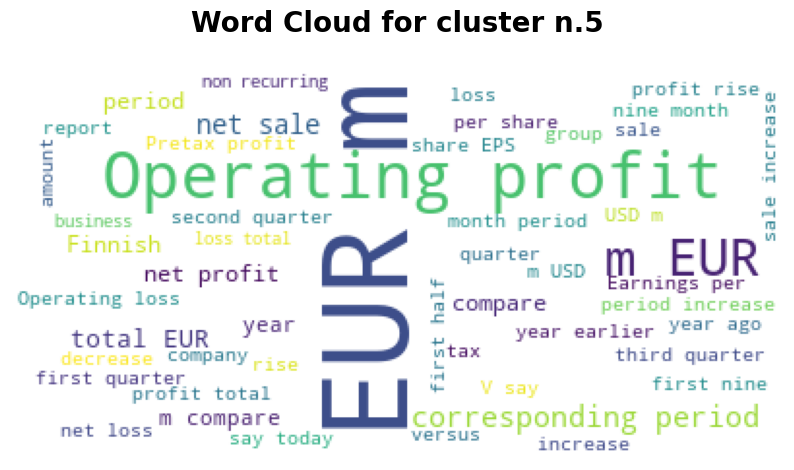

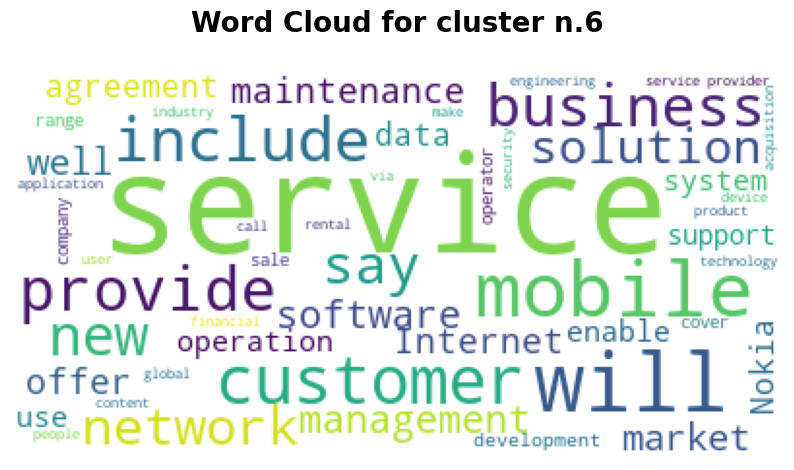

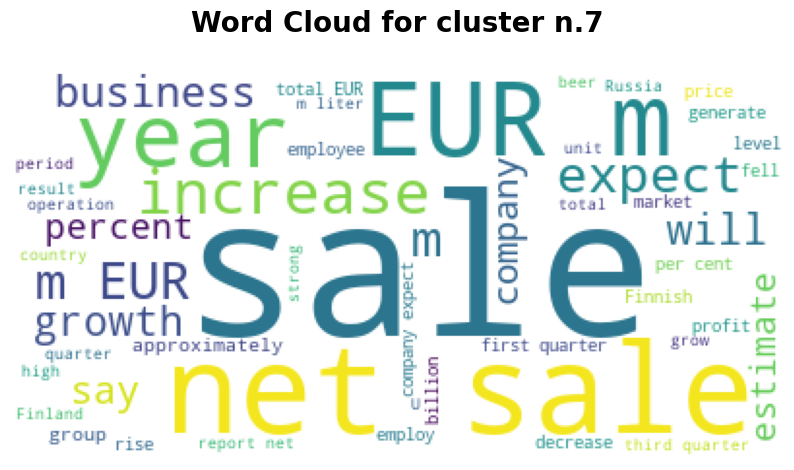

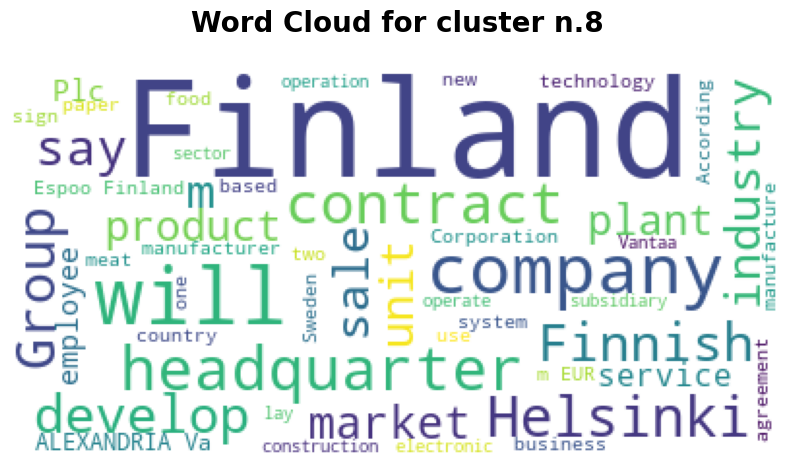

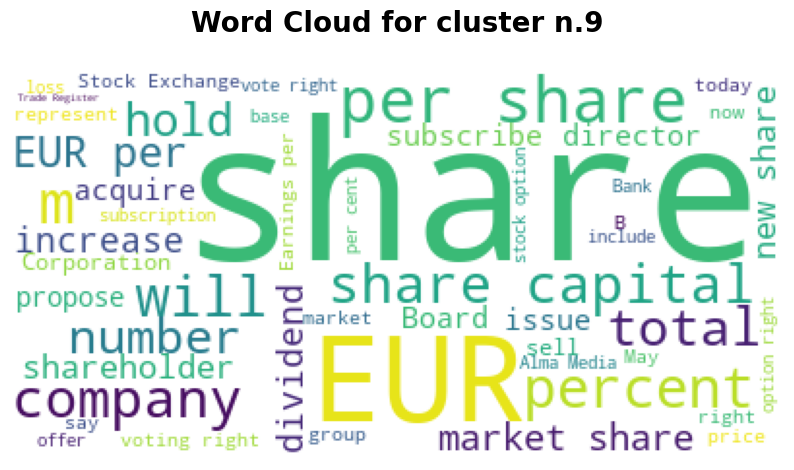

In [40]:
for i in range(len(lista_indx)):
    wordcount_gen(df, i)